# Analyse d'un Modèle d'Arbre de Décision sur le Dataset Iris
Ce notebook va démontrer l'application d'un modèle d'arbre de décision sur le célèbre dataset Iris, qui est souvent utilisé pour illustrer des concepts en machine learning. Nous allons passer par plusieurs étapes, de la préparation des données à la visualisation de l'arbre de décision. Chaque étape sera expliquée en détails.

## 1. Importation des Librairies et du Dataset
Nous commençons par importer les bibliothèques nécessaires et charger le dataset Iris. Ce dataset contient 150 échantillons de fleurs avec quatre caractéristiques : longueur et largeur des sépales et des pétales, ainsi que la classification de la fleur en trois classes différentes (Setosa, Versicolor, Virginica).

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Chargement des données Iris
iris = load_iris()
X = iris.data  # Les données de caractéristiques
y = iris.target  # Les classes cibles

# Affichage des dimensions des données et des noms des caractéristiques
print('X.shape', X.shape)  # Affiche (150, 4) - 150 échantillons, 4 caractéristiques
print('y.shape', y.shape)  # Affiche (150,) - 150 échantillons
print('variables', iris.feature_names)  # Affiche les noms des caractéristiques
print('targets', iris.target_names)  # Affiche les noms des classes cibles


X.shape (150, 4)
y.shape (150,)
variables ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets ['setosa' 'versicolor' 'virginica']


## 2. Visualisation Initiale des Données
Avant de créer un modèle, nous pouvons visualiser rapidement les données en traçant un graphique de dispersion de deux des caractéristiques (ici, la longueur et la largeur des sépales).

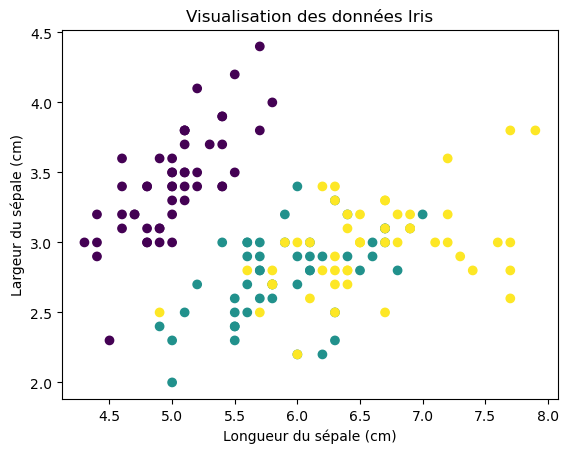

In [37]:
# Visualisation simple des deux premières caractéristiques
plt.scatter(X[:, 0], X[:, 1], c=y)  # c=y colorie les points en fonction des classes cibles
plt.xlabel('Longueur du sépale (cm)')
plt.ylabel('Largeur du sépale (cm)')
plt.title('Visualisation des données Iris')
plt.show()


## 3. Séparation des Données en Entraînement et Test
Nous séparons les données en deux ensembles : un ensemble pour l'entraînement du modèle et un ensemble pour le test. Cela nous permet de vérifier la performance du modèle sur des données qu'il n'a pas vues.

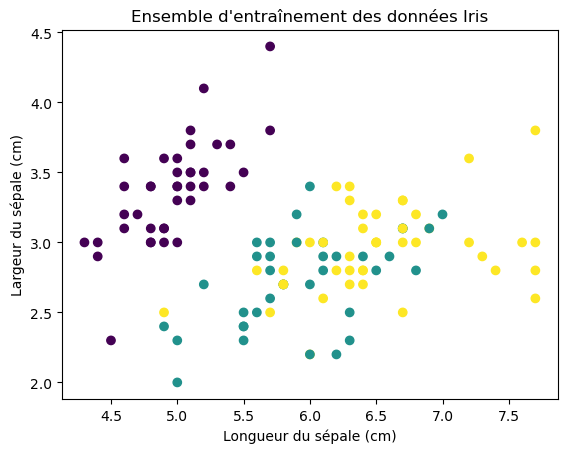

In [39]:
# Séparation des données en ensemble d'entraînement et de test
# 80 % pour l'entraînement et 20 % pour le test. random_state=1 garantit que la séparation est reproductible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Visualisation de l'ensemble d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('Longueur du sépale (cm)')
plt.ylabel('Largeur du sépale (cm)')
plt.title('Ensemble d\'entraînement des données Iris')
plt.show()


## 4. Entraînement d'un Modèle d'Arbre de Décision
Nous utilisons un arbre de décision pour classifier les données. Les arbres de décision sont des modèles populaires pour leur simplicité et leur capacité à être visualisés.

- L'arbre de décision est construit sans limite de profondeur. Cela signifie qu'il continuera à se diviser tant qu'il y a des améliorations possibles.
- Le score obtenu mesure la performance du modèle sur les données de test.

In [41]:
# Création et entraînement du modèle d'arbre de décision
model = DecisionTreeClassifier(max_depth=None)  # max_depth=None permet de ne pas limiter la profondeur de l'arbre
model.fit(X_train, y_train)  # Entraînement sur l'ensemble d'entraînement

# Évaluation du modèle sur l'ensemble de test
score = model.score(X_test, y_test)  # Renvoie l'exactitude du modèle
print(f"Précision sur l'ensemble de test : {score*100:.2f}%")


Précision sur l'ensemble de test : 96.67%


## Bonus : Métrique de Classification

Une matrice de confusion est un tableau qui permet d'évaluer la performance d'un modèle de classification en comparant les prédictions du modèle avec les résultats réels.

Elle est souvent utilisée pour les problèmes de classification binaire ou multiclasses. La matrice a généralement quatre cases pour une classification binaire :

- TP (True Positives) : Nombre de prédictions positives correctes (le modèle a prédit la classe positive et c'était correct).
- TN (True Negatives) : Nombre de prédictions négatives correctes (le modèle a prédit la classe négative et c'était correct).
- FP (False Positives) : Nombre de fausses prédictions positives (le modèle a prédit la classe positive alors que c'était incorrect, aussi appelé "faux positifs" ou "erreurs de type I").
- FN (False Negatives) : Nombre de fausses prédictions négatives (le modèle a prédit la classe négative alors que c'était incorrect, aussi appelé "faux négatifs" ou "erreurs de type II").


<img src="attachment:6a5a788c-c282-4ac8-be13-831d9859fcac.png" alt="image.png" width="600"/>


In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

## 5. Visualisation de l'Arbre de Décision
Nous utilisons la fonction plot_tree pour visualiser l'arbre de décision généré par le modèle.
- L'arbre de décision est visualisé avec les caractéristiques (feature_names) et les classes cibles (class_names). Le paramètre filled=True colore les nœuds en fonction des classes prédominantes.
- L'arbre permet de visualiser les décisions prises à chaque étape de la classification.

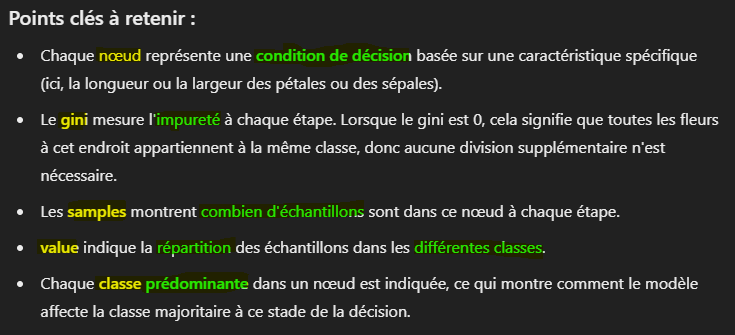


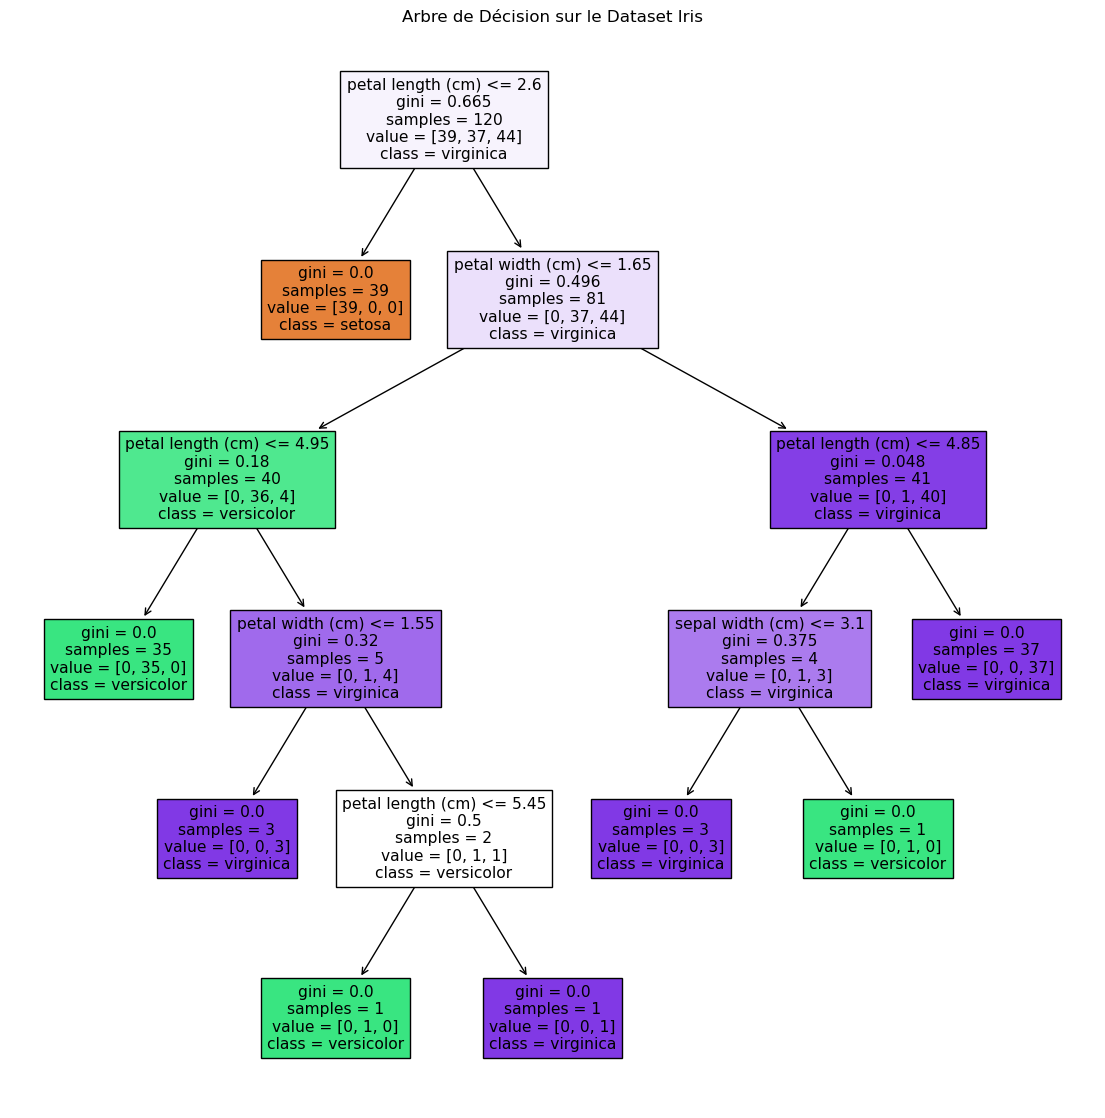

In [ ]:
# Visualisation de l'arbre de décision
plt.figure(figsize=(14, 14))  # Taille de la figure
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)  # Arbre de décision
plt.title('Arbre de Décision sur le Dataset Iris')

# Sauvegarder le graphe
#plt.savefig('data/decision_tree_Iris.png')  # Spécifiez le nom du fichier

plt.show()



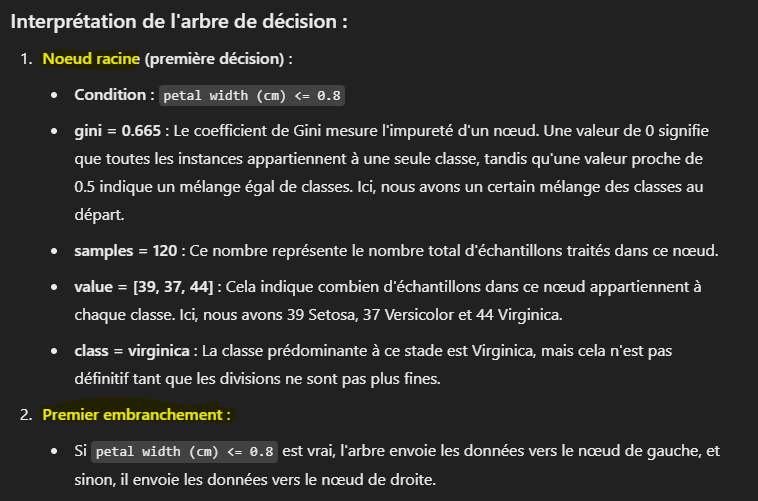
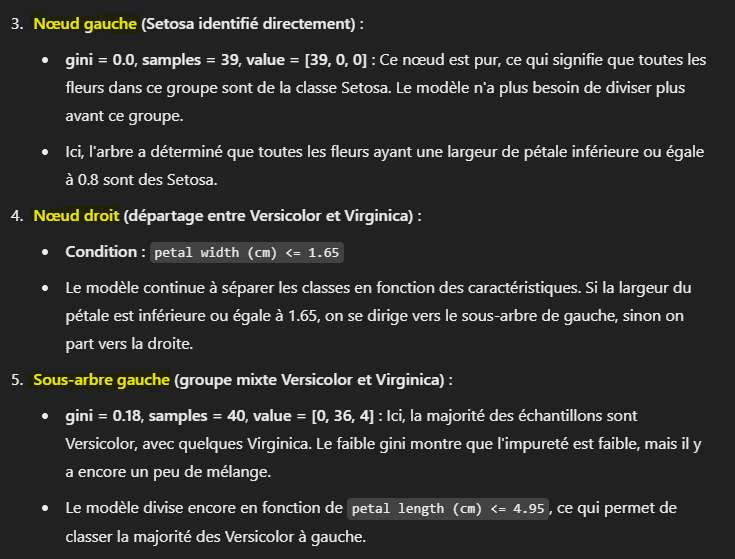
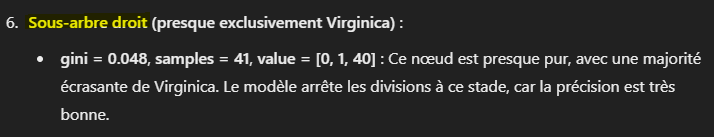

## 6. prédiction sur un nouvel échantillon

In [48]:
# Plusieurs nouveaux échantillons
nouveaux_echantillons = [[5.0, 3.5, 1.3, 0.3], [6.5, 3.0, 5.5, 2.0], [4.9, 2.4, 3.3, 1.0]]

# Faire une prédiction pour chaque échantillon
predictions = model.predict(nouveaux_echantillons)

# Afficher les prédictions
for i, pred in enumerate(predictions):
    print(f"Prédiction pour l'échantillon {i+1} : {iris.target_names[pred]}")


Prédiction pour l'échantillon 1 : setosa
Prédiction pour l'échantillon 2 : virginica
Prédiction pour l'échantillon 3 : versicolor


# Analyse d'un modèle KNeighborsClassifier

## 1. Importation des librairies et du classifieur KNeighborsClassifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Chargement du dataset Iris
iris = load_iris()
X = iris.data  # Les données de caractéristiques
y = iris.target  # Les classes cibles

# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


## 2. Entraîner un modèle KNN
- Nous allons initialiser le classifieur KNN avec un nombre de voisins 𝑘=5.   
Cela signifie que le modèle va chercher les 5 voisins les plus proches d'un point pour déterminer à quelle classe il appartient.   
Vous pouvez ajuster le nombre de voisins en fonction de la précision que vous souhaitez atteindre.
- knn_model.fit() : Le modèle est entraîné sur les données d'entraînement.
- knn_model.score() : La fonction score calcule la précision du modèle sur l'ensemble de test.


In [52]:
# Création et entraînement d'un modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Évaluation du modèle sur l'ensemble de test
knn_score = knn_model.score(X_test, y_test)
print(f"Précision du modèle KNN sur l'ensemble de test : {knn_score*100:.2f}%")



Précision du modèle KNN sur l'ensemble de test : 100.00%


## 3. Faire une prédiction sur un nouvel échantillon
Nous allons maintenant utiliser le modèle KNN pour prédire la classe d'un nouvel échantillon, comme nous l'avons fait avec l'arbre de décision.

In [54]:
# Plusieurs nouveaux échantillons
nouveaux_echantillons = [[5.0, 3.5, 1.3, 0.3], [6.5, 3.0, 5.5, 2.0], [4.9, 2.4, 3.3, 1.0]]

# Faire une prédiction pour chaque échantillon avec KNN
knn_predictions = knn_model.predict(nouveaux_echantillons)

# Afficher les prédictions
for i, pred in enumerate(knn_predictions):
    print(f"Prédiction pour l'échantillon {i+1} avec KNN : {iris.target_names[pred]}")



Prédiction pour l'échantillon 1 avec KNN : setosa
Prédiction pour l'échantillon 2 avec KNN : virginica
Prédiction pour l'échantillon 3 avec KNN : versicolor


## 4. Visualisation des frontières de décision
Il n'est pas aussi facile de visualiser un KNN comme nous le faisons avec un arbre de décision.    
Cependant, nous pouvons tracer une visualisation 2D si nous réduisons les dimensions des données à deux caractéristiques.    
Cela permettra de voir les frontières entre les classes et les prédictions pour les nouveaux points.

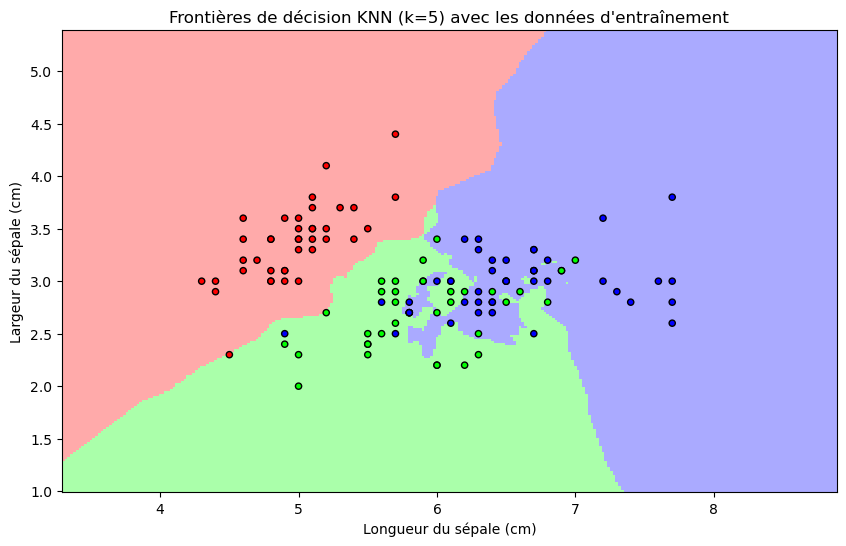

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Charger le dataset Iris
iris = load_iris()
X = iris.data[:, :2]  # On prend seulement les deux premières caractéristiques pour la visualisation 2D
y = iris.target

# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Créer et entraîner le modèle KNN avec 5 voisins
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Définir les couleurs pour les classes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # Couleurs pour les régions (fond clair)
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # Couleurs pour les points (fond vif)

# Création d'un maillage de points dans l'espace des caractéristiques
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # X[:, 0] = 1ere caractéristique (longueur du sépale), X[:, 1] = 2sd caractéristique (largeur du sépale).
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # x_min, x_max, y_min, y_max = les limites de l’espace sur lequel nous allons créer le maillage.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02)) # matrices xx et yy crées par le maillage 2D

# Prédiction sur chaque point du maillage
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()]) # il faut aplatir en 1D le maillage 2D pour passer les points au modèle KNN
Z = Z.reshape(xx.shape)

# Tracer le maillage avec les frontières de décision
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Tracer également les points d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Longueur du sépale (cm)')
plt.ylabel('Largeur du sépale (cm)')
plt.title('Frontières de décision KNN (k=5) avec les données d\'entraînement')

# Sauvegarder le graphe
#plt.savefig('data/frontieres_decision_KNN5.png')  # Spécifiez le nom du fichier

plt.show()



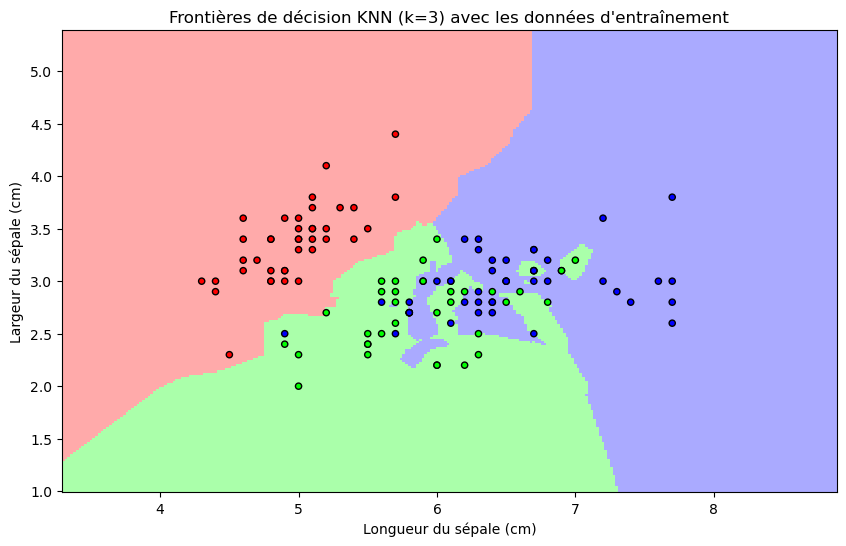

In [ ]:
# Réessayer avec un nombre de voisins différent (par exemple k=3)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Refaire les prédictions et afficher les nouvelles frontières de décision
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Longueur du sépale (cm)')
plt.ylabel('Largeur du sépale (cm)')
plt.title('Frontières de décision KNN (k=3) avec les données d\'entraînement')
# Sauvegarder le graphe
#plt.savefig('data/frontieres_decision_KNN3.png')  # Spécifiez le nom du fichier
plt.show()

